In [1]:
import numpy as np
import pandas as pd

In [3]:
# traitement réalisés précédemment
prets = pd.read_csv('prets.txt')

# calcul du taux d'endettement
prets['taux_endettement'] = round(prets['remboursement'] * 100 / prets['revenu'], 2)

# renommer taux en taux_interet
prets.rename(columns={'taux':'taux_interet'}, inplace=True)

# calculer le cout total du pret
prets['cout_total'] = prets['remboursement'] * prets['duree']

# calculer les bénéfices mensuels réalisés
prets['benefices'] = round((prets['cout_total'] * prets['taux_interet']/100)/(24), 2)

# création d'une variable risque
prets['risque'] = 'Non'
prets.loc[prets['taux_endettement'] > 35, 'risque'] = 'Oui'

# dataframe de profils clients
profil_clients = prets.groupby('identifiant')[['remboursement','taux_endettement','cout_total','benefices']].sum()
profil_clients.reset_index(inplace=True)
profil_clients.head()

prets.head()

,identifiant,ville,CP,revenu,remboursement,duree,type,taux_interet,taux_endettement,cout_total,benefices,risque
0,0,TOULOUSE,31100,3669.0,1130.05,240,immobilier,1.168,30.80,271212.0,131.99,Non
1,1,PARIS,75009,5310.0,240.00,64,automobile,3.701,4.52,15360.0,23.69,Non
2,1,PARIS,75009,5310.0,1247.85,300,immobilier,1.173,23.50,374355.0,182.97,Non
3,2,MARSEILLE,13010,1873.0,552.54,240,immobilier,0.972,29.50,132609.6,53.71,Non
4,3,MARSEILLE,13010,1684.0,586.03,180,immobilier,1.014,34.80,105485.4,44.57,Non


In [5]:
import matplotlib.pyplot as plt

Matplotlib is building the font cache; this may take a moment.


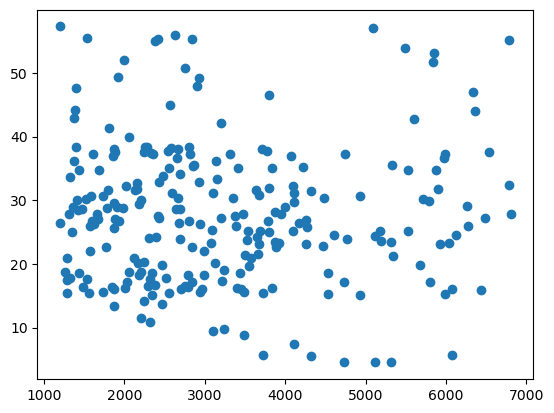

In [6]:
plt.scatter(prets['revenu'], prets['taux_endettement'])

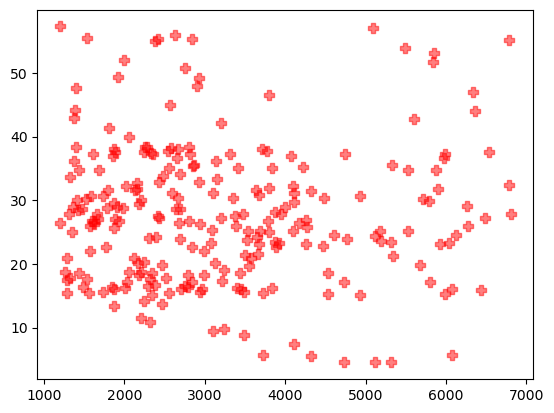

In [9]:
plt.scatter(prets['revenu'], prets['taux_endettement'],
    s=60, alpha=0.5, c='red', marker='P')

In [11]:
data = prets.groupby('ville')['remboursement'].sum()
data = data.reset_index()

([<matplotlib.patches.Wedge at 0x12e3b99a0>,
 [Text(1.0735482898052735, 0.2397792098080497, 'BORDEAUX'),
  Text(0.7559779933342196, 0.7990602440331811, 'LYON'),
  Text(-0.22079479320563616, 1.0776129450286316, 'MARSEILLE'),
  Text(-0.9928563505107825, 0.4735359197045252, 'NICE'),
  Text(-0.35667736499371744, -1.0405677571889005, 'PARIS'),
  Text(1.0582353655336645, -0.30022976390396683, 'TOULOUSE')])

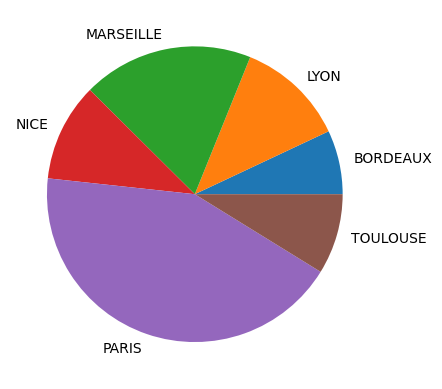

In [13]:
plt.pie(x=data['remboursement'], labels=data['ville'])

([<matplotlib.patches.Wedge at 0x12e4ef890>,
 [Text(1.0735482898052735, 0.2397792098080497, 'BORDEAUX'),
  Text(0.7559779933342196, 0.7990602440331811, 'LYON'),
  Text(-0.22079479320563616, 1.0776129450286316, 'MARSEILLE'),
  Text(-0.9928563505107825, 0.4735359197045252, 'NICE'),
  Text(-0.35667736499371744, -1.0405677571889005, 'PARIS'),
  Text(1.0582353655336645, -0.30022976390396683, 'TOULOUSE')],
 [Text(0.58557179443924, 0.1307886598952998, '6.99%'),
  Text(0.41235163272775605, 0.43585104219991694, '11.89%'),
  Text(-0.12043352356671062, 0.5877888791065262, '18.66%'),
  Text(-0.5415580093695176, 0.2582923198388319, '10.74%'),
  Text(-0.19455128999657312, -0.5675824130121275, '42.91%'),
  Text(0.5772192902910896, -0.1637616894021637, '8.80%')])

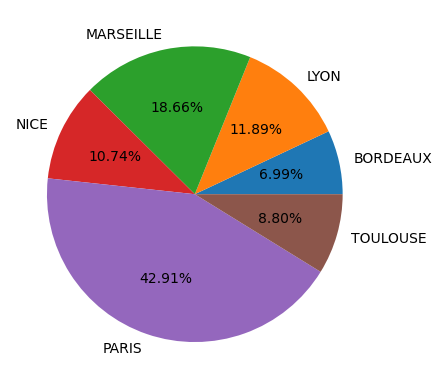

In [15]:
plt.pie(x=data['remboursement'], labels=data['ville'], autopct='%.2f%%')

<BarContainer object of 6 artists>

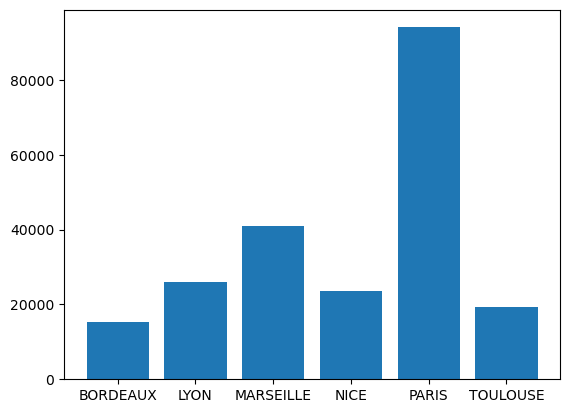

In [17]:
plt.bar(height=data['remboursement'], x=data['ville'])

<BarContainer object of 6 artists>

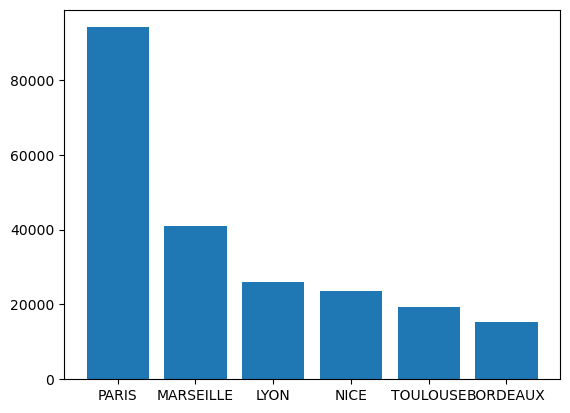

In [19]:
data_sorted = data.sort_values('remboursement', ascending=False)
plt.bar(height=data_sorted['remboursement'], x=data_sorted['ville'])

(array([38., 42., 43., 27., 31., 17., 10., 11., 15., 10.]),
 array([1200. , 1760.7, 2321.4, 2882.1, 3442.8, 4003.5, 4564.2, 5124.9,
        5685.6, 6246.3, 6807. ]),
 <BarContainer object of 10 artists>)

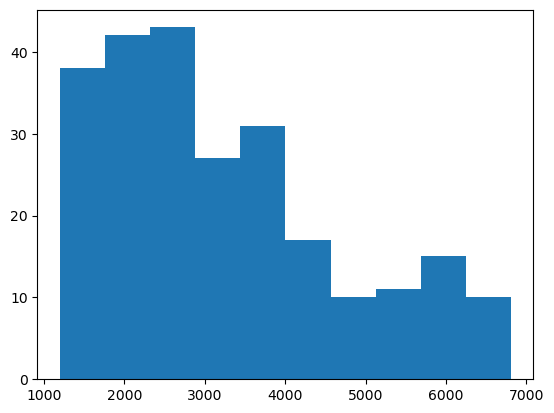

In [21]:
plt.hist(prets['revenu'])